# Prepare data
I saved the "inpatientCharges.csv' file after EDA and feature engineering as a new .csv file called "healthcare.csv", which I will use for this project.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('healthcare.csv')

In [2]:
# Check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 29 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   DRG                                           163065 non-null  object 
 1   Provider_Id                                   163065 non-null  int64  
 2   Provider_Name                                 163065 non-null  object 
 3   Provider_StreetAddress                        163065 non-null  object 
 4   Provider_City                                 163065 non-null  object 
 5   Provider_State                                163065 non-null  object 
 6   Provider_Zipcode                              163065 non-null  int64  
 7   Hospital_referral_region_desp                 163065 non-null  object 
 8   Total_Discharges                              163065 non-null  int64  
 9   Average_Total_Payments                        16

In [3]:
# Check for NaN or infinity values
if df.isnull().values.any():
    # Fill missing values with median
    df.fillna(df.median(), inplace=True)

# Keep 2 decimal points
df = df.round(2)

In [4]:
# Select features that I will use for KNN and PCA model
selected_features = ['Total_Discharges',
                     'Average_Total_Payments',
                     'Average_Medicare_Payment',
                     'Total_Payments_Per_Discharge',
                    'Medicare_Payments_Per_Discharge',
                    'Payment_Difference',
                    'Ratio_AvgTotalPayments_to_Median',
                    'Ratio_AvgMedPayment_to_Median',
                    'Ratio_TotalDischarges_to_Median',
                    'DRG_Median_Average_Total_Payments',
                    'DRG_Median_Total_Discharges',
                    'Ratio_AvgTotalPayments_to_Median_DRG',
                    'Ratio_AvgMedPayment_to_Median_DRG',
                    'Ratio_TotalDischarges_to_Median_DRG',
                    'Payment_Ratio_Deviation_from_Median_by_State',
                    'Payment_Ratio_Deviation_from_Median_by_DRG']

# Autoencoder


An autoencoder is a neural network that learns to encode input data into a more compact representation and then decode it back to the original form. By training on normal patterns, this unsupervised machine learning model can identify outliers during reconstruction, as deviations from learned patterns lead to higher errors. 

In [5]:
# Create a new DataFrame with the selected features
X = df[selected_features]

from sklearn.model_selection import train_test_split

#split data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [6]:
X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG
50634,24,20501.83,19789.20,854.24,824.55,-712.63,2.84,3.21,0.89,28601.24,24.0,0.72,0.75,1.00,1.63,0.11
129854,25,7553.12,5455.72,302.12,218.23,-2097.40,1.05,0.89,0.93,7061.00,27.0,1.07,0.90,0.93,0.12,0.01
22416,75,7929.56,7030.00,105.73,93.73,-899.56,1.10,1.14,2.78,8925.30,73.0,0.89,0.86,1.03,0.00,0.06
82322,24,3310.75,2608.58,137.95,108.69,-702.17,0.46,0.42,0.89,3176.58,25.0,1.04,1.18,0.96,0.39,0.04
86625,15,5846.80,4299.53,389.79,286.64,-1547.27,0.81,0.70,0.56,5990.31,16.0,0.98,0.81,0.94,0.10,0.08


In [7]:
from pyod.models.auto_encoder import AutoEncoder

2023-11-13 12:53:26.238064: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
atcdr = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])
atcdr.fit(X_train)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

3669/3669 [==============================] - 9s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 64/100
3669/3669 [==============================] - 10s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 65/100
3669/3669 [==============================] - 9s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 66/100
3669/3669 [==============================] - 9s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 67/100
3669/3669 [==============================] - 9s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 68/100
3669/3669 [==============================] - 9s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 69/100
3669/3669 [==============================] - 10s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 70/100
3669/3669 [==============================] - 10s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 71/100
3669/3669 [==============================] - 11s 3ms/step - loss: 1.0016 - val_loss: 0.9855
Epoch 72/100
3669/3669 [==============================] - 9s 3ms/step - l

AutoEncoder(batch_size=32, contamination=0.05, dropout_rate=0.2, epochs=100,
      hidden_activation='relu', hidden_neurons=[2, 2], l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x7fa478199280>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

- The model has one input layer, two hidden layers and one output layer. 
- The input layer is 16 because the model detects 16 input variables.
- There are 632 parameters to be trained in the model.

In [9]:
# Training data
y_train_scores = atcdr.decision_function(X_train)
y_train_pred = atcdr.predict(X_train)

# Test data
y_test_scores = atcdr.decision_function(X_test)
y_test_pred = atcdr.predict(X_test) # outlier labels (0 or 1)

1020/1020 [==============================] - 1s 1ms/step


# Determine the thershold

In [10]:
# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , atcdr.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))

The threshold for the defined contamination rate: 7.846497357924179
The training data: {0: 123929, 1: 6523}
The training data: {0: 31025, 1: 1588}


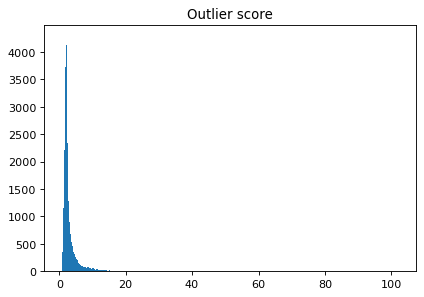

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=80)
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

- The threshold for the defined contamination rate is set at the approximately 7.85.

# Descriptive Statistics

In [12]:
threshold = atcdr.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG,Anomaly_Score
0,Normal,123929,94.999693,40.39,8512.55,7380.15,347.08,301.27,-1132.40,1.18,1.20,1.50,8223.69,33.51,1.04,1.05,1.23,0.45,0.18,2.57
1,Outlier,6523,5.000307,88.51,32460.33,29723.10,1540.97,1417.60,-2737.23,4.50,4.83,3.28,28537.19,37.67,1.22,1.20,1.90,3.47,1.07,11.85


The above table presents the characteristics of the normal and abnormal groups.

- There are 123929 datapoints in "Normal" group which constitute 95% of the data, and there are 6523 datapoint in "Outlier" group which is 5% of the total data.
- **The size of the outlier group:** The threshold for determining outliers is set at model suggested value. As a result, the size of the "Outlier" group is determined to be 5.00% of the total, indicating that 5% of the data points are considered outliers based on the chosen threshold.
- **The feature statistics in each group:** All the means are consistent with the domain knowledge. In this case, the means in the outlier group are substantially larger than those of the normal group. For example, the average total payments in normal group is 8512.55 and the average total payments in outlier group is 32460.33.
- **The average anomaly score:** The average score of the outlier group is higher than that of the normal group. (11.85>2.57)

# Aggregate to Achieve Model Stability -- Autoencoder

One of the issue of neuro networks is that they are sensitive to the noises and tend to overfitting. To mitigate the model overfitting and instability, we can train multiple autoencoder models and aggregate the average score together.

In [13]:
#I need to split data again because the previous model has comprimised the x_train and x_test.
X = df[selected_features]
X_train, X_test= train_test_split(X, test_size=0.2, random_state=42)

In [14]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.auto_encoder import AutoEncoder

# Model “atcdr1” has 2 hidden layers, and each hidden layer has 2 neurons. 
atcdr1 = AutoEncoder(contamination=0.05, hidden_neurons =[2, 2])

# Model “atcdr2” has 3 hidden layers, and each hidden layer has 10, 2, 10 neurons respectively.
atcdr2 = AutoEncoder(contamination=0.05, hidden_neurons =[10, 2, 10])

# Model “atcdr3” has 5 hidden layers, and each hidden layer has 15, 10, 2, 10 and 15 neurons respectively. 
atcdr3 = AutoEncoder(contamination=0.05, hidden_neurons =[15, 10, 2, 10, 15] )

# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)

# Prepare data frames so we can store the model results. There are three models.
train_scores = np.zeros([X_train.shape[0], 3])
test_scores = np.zeros([X_test.shape[0], 3])
atcdr1.fit(X_train_norm)
atcdr2.fit(X_train_norm)
atcdr3.fit(X_train_norm)
    
# Store the results in each column:
train_scores[:, 0] = atcdr1.decision_function(X_train_norm) 
train_scores[:, 1] = atcdr2.decision_function(X_train_norm) 
train_scores[:, 2] = atcdr3.decision_function(X_train_norm)
test_scores[:, 0] = atcdr1.decision_function(X_test_norm) 
test_scores[:, 1] = atcdr2.decision_function(X_test_norm) 
test_scores[:, 2] = atcdr3.decision_function(X_test_norm)

# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
 dropout_6 (Dropout)         (None, 2)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                

3669/3669 [==============================] - 11s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 64/100
3669/3669 [==============================] - 9s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 65/100
3669/3669 [==============================] - 11s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 66/100
3669/3669 [==============================] - 10s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 67/100
3669/3669 [==============================] - 11s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 68/100
3669/3669 [==============================] - 10s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 69/100
3669/3669 [==============================] - 13s 4ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 70/100
3669/3669 [==============================] - 10s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 71/100
3669/3669 [==============================] - 13s 3ms/step - loss: 0.9966 - val_loss: 1.0308
Epoch 72/100
3669/3669 [==============================] - 11s 3ms/ste

3669/3669 [==============================] - 11s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 23/100
3669/3669 [==============================] - 10s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 24/100
3669/3669 [==============================] - 10s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 25/100
3669/3669 [==============================] - 11s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 26/100
3669/3669 [==============================] - 11s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 27/100
3669/3669 [==============================] - 12s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 28/100
3669/3669 [==============================] - 10s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 29/100
3669/3669 [==============================] - 10s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 30/100
3669/3669 [==============================] - 11s 3ms/step - loss: 0.9971 - val_loss: 1.0265
Epoch 31/100
3669/3669 [==============================] - 12s 3ms/st

4077/4077 [==============================] - 8s 2ms/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 15)                255       
                                                                 
 dropout_15 (Dropout)        (None, 15)                0         
                                                               

3669/3669 [==============================] - 14s 4ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 55/100
3669/3669 [==============================] - 14s 4ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 56/100
3669/3669 [==============================] - 14s 4ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 57/100
3669/3669 [==============================] - 11s 3ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 58/100
3669/3669 [==============================] - 14s 4ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 59/100
3669/3669 [==============================] - 14s 4ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 60/100
3669/3669 [==============================] - 13s 4ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 61/100
3669/3669 [==============================] - 12s 3ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 62/100
3669/3669 [==============================] - 13s 4ms/step - loss: 1.0021 - val_loss: 0.9814
Epoch 63/100
3669/3669 [==============================] - 11s 3ms/st

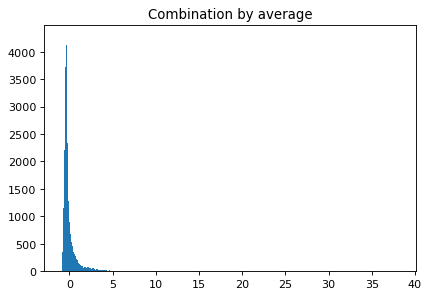

In [15]:
plt.figure(figsize=(6, 4), dpi=80)
# Combination by average
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

The Histogram of the Average Prediction of the Training Data suggests the threshold around 4.


In [16]:
descriptive_stat_threshold(X_train,y_train_by_average, 4.0)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG,Anomaly_Score
0,Normal,129031,98.91071,41.90,9313.24,8133.59,385.42,337.53,-1179.65,1.29,1.32,1.55,8958.37,33.7,1.05,1.05,1.25,0.55,0.21,-0.07
1,Outlier,1421,1.08929,124.27,45737.98,41529.38,2346.00,2133.29,-4208.60,6.34,6.74,4.60,34760.34,34.9,1.40,1.32,2.31,5.24,2.13,6.00


The above table presents the characteristics of the normal and abnormal groups.

- There are 129031 datapoints in "Normal" group which constitute 99% of the data, and there are 1421 datapoint in "Outlier" group which is 1% of the total data.
- **The size of the outlier group:** The threshold for determining outliers is set at model suggested value. As a result, the size of the "Outlier" group is determined to be 1.10% of the total, indicating that 1% of the data points are considered outliers based on the chosen threshold.
- **The feature statistics in each group:** All the means are consistent with the domain knowledge. In this case, the means in the outlier group are substantially larger than those of the normal group. For example, the average total payments in nomal group is 9313.24 and the average total payments in outlier group is 45737.98.
- **The average anomaly score:** The average score of the outlier group is higher than that of the normal group. (6.00>-0.07)

# Isolate Forest

Isolation Forest is an unsupervised machine learning algorithm that isolates outliers in a dataset directly by constructing a random forest of decision trees. It identifies anomalies based on the observation that they require fewer steps to isolate than normal instances. This method is particularly efficient for detecting outliers in large datasets, as anomalies are isolated more readily, making the Isolation Forest model a valuable tool for anomaly detection.

In [17]:
#I need to split data again because the previous model has comprimised the x_train and x_test.
X = df[selected_features]
X_train, X_test= train_test_split(X, test_size=0.2, random_state=42)

In [18]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new') 
isft.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples=40, n_estimators=100, n_jobs=1,
    random_state=None, verbose=0)

In [19]:
# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))

/Users/vickyma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/vickyma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/vickyma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/Users/vickyma/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


The threshold for the defined contamination rate: -4.979431411200174e-17
The training data: {0: 123929, 1: 6523}
The training data: {0: 31012, 1: 1601}


- The threshold value -4.979431411200174e-17 is an extremely small number in scientific notation. It is close to zero, indicating an extremely low contamination rate. This means that the Isolation Forest model is configured to identify anomalies based on the assumption that they constitute an exceptionally small fraction of the overall dataset. The lower the contamination rate, the more sensitive the model is to outliers, as it expects them to be rare. 

# Variable Importance

In [20]:
isft_vi = isft.feature_importances_
isft_vi

array([0.06250622, 0.06808501, 0.0551953 , 0.05260935, 0.05135557,
       0.05954052, 0.04740409, 0.06721964, 0.08974219, 0.07566729,
       0.0757045 , 0.06339075, 0.04622771, 0.05964668, 0.08043639,
       0.04526878])

- Higher values indicate that the corresponding feature is considered more important by the model.
- The sum of all values in the array is 1, as these are often normalized to represent proportions or percentages.
- For example:
1. The feature corresponding to the first value in the array has an importance of approximately 6.25%.
2. The feature corresponding to the second value has an importance of approximately 6.81%, and so on.

In [21]:
print(len(X_train_pd.columns))
print(len(isft_vi))

18
16


Text(0.5, 1.0, 'Variable importance of IForest for Outliers')

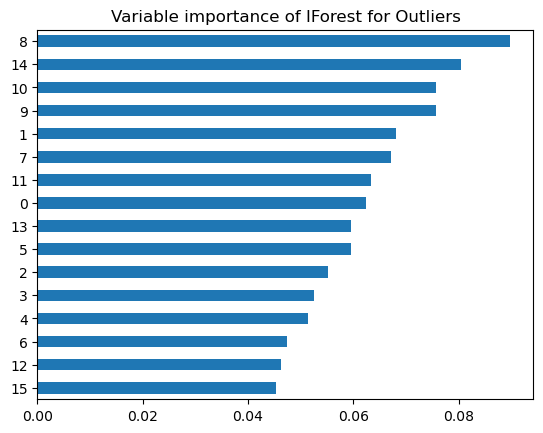

In [22]:
for_plot = pd.DataFrame({'x_axis': X_train_pd.columns[:16], 
                         'y_axis': isft_vi}).sort_values(by='y_axis', ascending=True)
for_plot['y_axis'].plot.barh()
plt.title('Variable importance of IForest for Outliers')

- 8th feature 'Ratio_TotalDischarges_to_Median' has the highest variance importance to the model.
- 15th feature 'Payment_Ratio_Deviation_from_Median_by_DRG' has the comparatively lowest variance importance to the model

# Determine a Reasonable Threshold for the Model

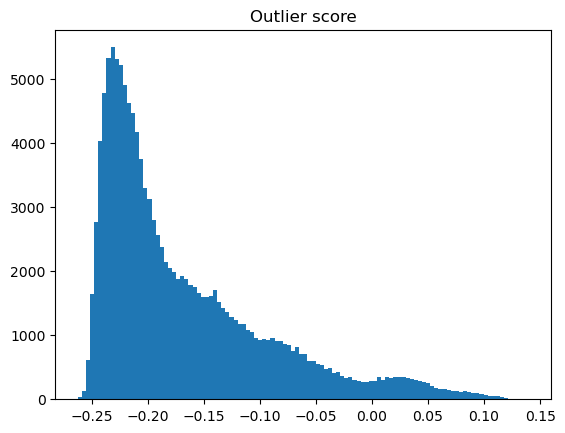

In [23]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

# Descriptive Statistics

In [24]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG,Anomaly_Score
0,Normal,123929,94.999693,41.69,8402.54,7266.44,345.29,298.99,-1136.09,1.16,1.18,1.54,8114.33,33.79,1.04,1.05,1.24,0.44,0.18,-0.18
1,Outlier,6523,5.000307,63.95,34550.35,31883.31,1574.90,1460.93,-2667.04,4.79,5.18,2.37,30614.87,32.21,1.20,1.18,1.61,3.73,1.14,0.04


The above table presents the characteristics of the normal and abnormal groups.

- There are 123929 datapoints in "Normal" group which constitute 95% of the data, and there are 6523 datapoint in "Outlier" group which is 5% of the total data.
- **The size of the outlier group:** The threshold for determining outliers is set at model suggested value. As a result, the size of the "Outlier" group is determined to be 5.00% of the total, indicating that 5% of the data points are considered outliers based on the chosen threshold.
- **The feature statistics in each group:** All the means are consistent with the domain knowledge. In this case, the means in the outlier group are substantially larger than those of the normal group. For example, the average total payments in nomal group is8402.54 and the average total payments in outlier group is 34550.35.
- **The average anomaly score:** The average score of the outlier group is higher than that of the normal group. (0.45>-0.18)

# Achieve Model Stability by Aggregating Multiple -- iForest Models

Ensembling multiple iForest models enhances outlier detection by reducing model variance and improving generalization. By combining the decisions of individual models, the ensemble becomes more robust to noise, captures diverse aspects of anomalies, and provides increased sensitivity in detecting outliers.

In [25]:
#I need to split data again because the previous model has comprimised the x_train and x_test.
X = df[selected_features]
X_train, X_test= train_test_split(X, test_size=0.2, random_state=42)

In [26]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.iforest import IForest

# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)

# Test a range of the number of trees
k_list = [100, 200, 300, 400, 500]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])

# Modeling
for i in range(n_clf):
    k = k_list[i]
    #isft = IForest(contamination=0.05, max_samples=k) 
    isft = IForest(contamination=0.05, n_estimators=k) 
    isft.fit(X_train_norm)
    
    # Store the results in each column:
    train_scores[:, i] = isft.decision_function(X_train_norm) 
    test_scores[:, i] = isft.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

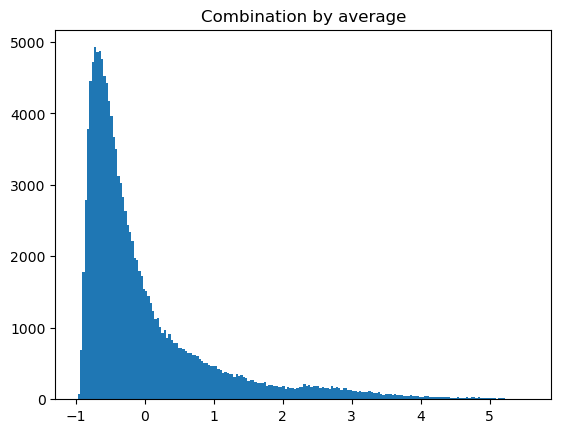

In [27]:
# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

- The Histogram of the Average Prediction of the Training Data suggests the threshold around 4.

In [28]:
descriptive_stat_threshold(X_train,y_train_by_average, 4.0)

,Group,Count,Count %,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Total_Payments_Per_Discharge,Medicare_Payments_Per_Discharge,Payment_Difference,Ratio_AvgTotalPayments_to_Median,Ratio_AvgMedPayment_to_Median,Ratio_TotalDischarges_to_Median,DRG_Median_Average_Total_Payments,DRG_Median_Total_Discharges,Ratio_AvgTotalPayments_to_Median_DRG,Ratio_AvgMedPayment_to_Median_DRG,Ratio_TotalDischarges_to_Median_DRG,Payment_Ratio_Deviation_from_Median_by_State,Payment_Ratio_Deviation_from_Median_by_DRG,Anomaly_Score
0,Normal,129518,99.284028,42.87,9379.36,8189.84,389.57,341.16,-1189.53,1.3,1.33,1.59,9014.00,33.79,1.05,1.05,1.26,0.56,0.21,-0.03
1,Outlier,934,0.715972,33.43,55560.89,51142.34,2792.92,2566.35,-4418.55,7.7,8.30,1.24,40499.12,23.35,1.46,1.40,1.32,6.56,2.84,4.54


- The above table presents the characteristics of the normal and abnormal groups.

- There are 129518 datapoints in "Normal" group which constitute 99.3% of the data, and there are 934 datapoint in "Outlier" group which is 0.7% of the total data.
- **The size of the outlier group:** The threshold for determining outliers is set at model suggested value. As a result, the size of the "Outlier" group is determined to be 0.72% of the total, indicating that 0.72% of the data points are considered outliers based on the chosen threshold.
- **The feature statistics in each group:** All the means are consistent with the domain knowledge. In this case, the means in the outlier group are substantially larger than those of the normal group. For example, the average total payments in nomal group is 9379.36 and the average total payments in outlier group is 55560.89.
- **The average anomaly score:** The average score of the outlier group is higher than that of the normal group. (4.54 > -0.03)